In [2]:
import squidpy as sq

# Load a sample dataset
adata = sq.datasets.imc()  # Load imaging mass cytometry data
print(adata)

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'


In [6]:
print(adata.uns)  # Check if there is any spatial data

{'cell type_colors': array(['#279e68', '#8c564b', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78',
       '#c5b0d5', '#f7b6d2', '#dbdb8d', '#ad494a', '#8c6d31'],
      dtype=object)}


In [20]:
print(adata.obsm)  # Check if the spatial coordinates exist
print(adata.obsm['spatial'])  # Access the spatial coordinates

AxisArrays with keys: spatial
[[  1.70909091  15.32727273]
 [  3.84946237  42.07526882]
 [  0.86666667  50.33333333]
 ...
 [730.14285714 636.96428571]
 [730.375      658.04166667]
 [729.87628866 679.63917526]]


In [18]:
print(adata.obs.head())
print(adata.obs.tail())

               cell type
0   apoptotic tumor cell
1   apoptotic tumor cell
2  p53+ EGFR+ tumor cell
3   apoptotic tumor cell
4   apoptotic tumor cell
                  cell type
4707   apoptotic tumor cell
4708   apoptotic tumor cell
4709   apoptotic tumor cell
4710  p53+ EGFR+ tumor cell
4711   apoptotic tumor cell


In [10]:
print(adata.var.head())  # Check the first few rows of feature (gene/marker) metadata

Empty DataFrame
Columns: []
Index: [1021522Tm169Di EGFR, 1031747Er167Di ECadhe, 112475Gd156Di Estroge, 117792Dy163Di GATA3, 1261726In113Di Histone]


/Users/guoz/miniconda3/envs/squidpy-env/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


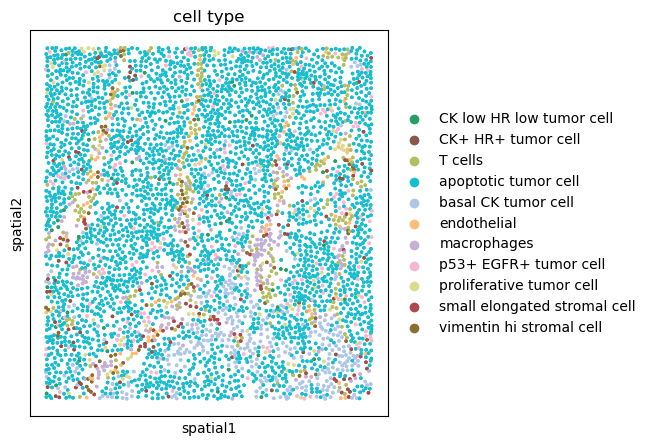

In [14]:
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

In [22]:
#sanity check, what is this anndata, export to json

import json
import pandas as pd
 
# Assuming 'adata' is your AnnData object
 
# Convert obs and var to dictionaries
obs_dict = adata.obs.to_dict(orient='list')
var_dict = adata.var.to_dict(orient='list')
 
# Convert obsm (if embeddings exist) to a dictionary
obsm_dict = {key: adata.obsm[key].tolist() for key in adata.obsm}
 
# Convert the main expression matrix 'X' (dense format, or convert if sparse)
X_matrix = adata.X
if not isinstance(X_matrix, pd.DataFrame):
    X_matrix = X_matrix.toarray() if hasattr(X_matrix, "toarray") else X_matrix
 
# Create a final dictionary combining all parts
adata_dict = {
    'X': X_matrix.tolist(),  # Convert matrix to list
    'obs': obs_dict,
    'var': var_dict,
    'obsm': obsm_dict
}
 
# Export to JSON file
with open('adata_export.csv', 'w') as f:
    json.dump(adata_dict, f)

In [23]:
#sanity check, what is this anndata, export to csv 
 
# 1. Export the expression matrix 'X' (as dense, if necessary)
X_matrix = adata.X
if not isinstance(X_matrix, pd.DataFrame):
    X_matrix = pd.DataFrame(X_matrix.toarray() if hasattr(X_matrix, "toarray") else X_matrix, 
                            index=adata.obs_names, columns=adata.var_names)
X_matrix.to_csv('adata_expression_matrix.csv')
 
# 2. Export the cell metadata 'obs'
adata.obs.to_csv('adata_obs.csv')
 
# 3. Export the gene metadata 'var'
adata.var.to_csv('adata_var.csv')
 
# 4. Export embeddings (e.g., UMAP coordinates) from 'obsm' if available
for key in adata.obsm.keys():
    pd.DataFrame(adata.obsm[key], index=adata.obs_names).to_csv(f'adata_{key}.csv')

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


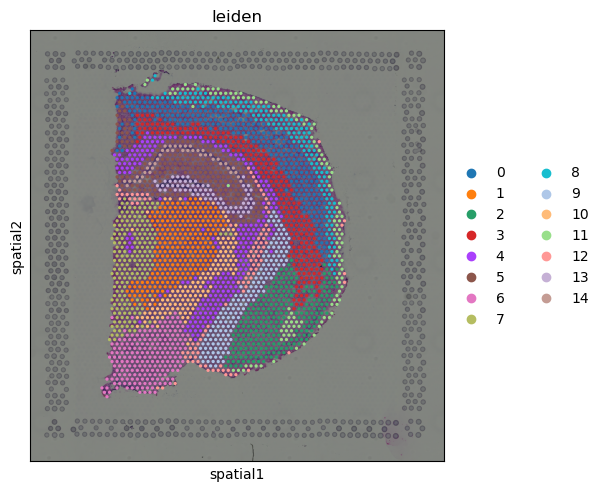

In [3]:
#example 2 Load the Visium dataset (spatial transcriptomics)
adata2 = sq.datasets.visium_hne_adata()

# Check the structure of the dataset
print(adata2)

# Plot the spatial scatter plot
sq.pl.spatial_scatter(adata2, color="leiden")
